 # TRABALHO DE IAA002 – Linguagem de Programação Aplicada

**EQUIPE 12:**

**Participantes - E-mail**

*   Eduardo Dan Shimada - eduardo.shimada@ufpr.br
*   Filipe Antonio Mariotti - mariotti.filipe@ufpr.br
*   Gabriele Azevedo Pedroso - gabriele.pedroso@ufpr.br
*   Lucas Machado - lucasmachado1@ufpr.br
*   Silas Juan Santos Lago - silas.lago@ufpr.br
*   Vinícius Marcondes Vieira - vinicius.marcondes@ufpr.br


O que deve ser entregue:
1. Um arquivo compactado (.zip) contendo todos os documentos pertinentes
2. **Um documento PDF contendo a lista de comandos Python que foram executados,
com suas respectivas saídas**
3. Os scripts em Python (arquivos .ipynb - extensão Jupyter Notebook) que foram
executados por vocês
4. Um arquivo de texto com as respostas das questões discursivas (questões 1.f, 2.e, 2.g,
3.f e 3.h)

Nome da base de dados do exercício: precos_carros_brasil.csv
Informações sobre a base de dados:
Dados dos preços médios dos carros brasileiros, das mais diversas marcas, no ano de 2021, de
acordo com dados extraídos da tabela FIPE (Fundação Instituto de Pesquisas Econômicas). A
base original foi extraída do site Kaggle (Acesse aqui a base original). A mesma foi adaptada
para ser utilizada no presente exercício.
Observação: As variáveis fuel , gear e engine_size foram extraídas dos valores da coluna model,
pois na base de dados original não há coluna dedicada a esses valores. Como alguns valores do
modelo não contêm as informações do tamanho do motor, este conjunto de dados não contém
todos os dados originais da tabela FIPE.

# <font color="blue">1 Análise Exploratória dos dados</font>

a) Carregue a base de dados media_precos_carros_brasil.csv

In [162]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dados = pd.read_csv('precos_carros_brasil.csv', decimal=',')

b) Verifique se há valores faltantes nos dados. Caso haja, escolha uma tratativa para
resolver o problema de valores faltantes

In [163]:
dados.dtypes

,0
year_of_reference,float64
month_of_reference,object
fipe_code,object
authentication,object
brand,object
model,object
fuel,object
gear,object
engine_size,float64
year_model,float64


In [164]:
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1.0,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,1.6,2001.0,12525.0


In [165]:
dados.isna().any()

,0
year_of_reference,True
month_of_reference,True
fipe_code,True
authentication,True
brand,True
model,True
fuel,True
gear,True
engine_size,True
year_model,True


In [166]:
dados.isna().sum()

,0
year_of_reference,65245
month_of_reference,65245
fipe_code,65245
authentication,65245
brand,65245
model,65245
fuel,65245
gear,65245
engine_size,65245
year_model,65245


c) Verifique se há dados duplicados nos dados

In [167]:
dados.duplicated().sum()

np.int64(65246)

In [168]:
dados.drop_duplicates(inplace=True, keep=False)

In [169]:
dados.duplicated().sum()

np.int64(0)

In [170]:
dados.isna().any()

,0
year_of_reference,False
month_of_reference,False
fipe_code,False
authentication,False
brand,False
model,False
fuel,False
gear,False
engine_size,False
year_model,False


In [171]:
dados.isna().sum()

,0
year_of_reference,0
month_of_reference,0
fipe_code,0
authentication,0
brand,0
model,0
fuel,0
gear,0
engine_size,0
year_model,0


In [172]:
dados.isna()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
202292,False,False,False,False,False,False,False,False,False,False,False
202293,False,False,False,False,False,False,False,False,False,False,False
202294,False,False,False,False,False,False,False,False,False,False,False
202295,False,False,False,False,False,False,False,False,False,False,False


In [173]:
dados.isna().sum()

,0
year_of_reference,0
month_of_reference,0
fipe_code,0
authentication,0
brand,0
model,0
fuel,0
gear,0
engine_size,0
year_model,0


d) Crie duas categorias, para separar colunas numéricas e categóricas. Imprima o resumo
de informações das variáveis numéricas e categóricas (estatística descritiva dos dados)

In [174]:
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

In [175]:
dados.dtypes

,0
year_of_reference,float64
month_of_reference,object
fipe_code,object
authentication,object
brand,object
model,object
fuel,object
gear,object
engine_size,float64
year_model,float64


In [176]:
dados[numericas_cols].head()

,year_of_reference,engine_size,year_model,avg_price_brl
0,2021.0,1.0,2002.0,9162.0
1,2021.0,1.0,2001.0,8832.0
2,2021.0,1.0,2000.0,8388.0
3,2021.0,1.0,2000.0,8453.0
4,2021.0,1.6,2001.0,12525.0


In [177]:
dados[categoricas_cols].head()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear
0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual
1,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual
2,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual
3,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual
4,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual


e) Imprima a contagem de valores por modelo (model) e marca do carro (brand)

In [178]:
dados['model'].value_counts()

,count
model,
Palio Week. Adv/Adv TRYON 1.8 mpi Flex,425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p,425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.,400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V,400
Doblo Adv/Adv TRYON/LOCKER 1.8 Flex,375
...,...
STEPWAY Zen Flex 1.0 12V Mec.,2
Polo Track 1.0 Flex 12V 5p,2
Saveiro Robust 1.6 Total Flex 16V,2


In [179]:
dados['brand'].value_counts()

,count
brand,
Fiat,44962
VW - VolksWagen,44312
GM - Chevrolet,38590
Ford,33149
Renault,29190
Nissan,12090


# <font color="blue">2 Visualização dos dados</font>

A partir da base de dados precos_carros_brasil.csv, execute as seguintes tarefas:

a) Gere um gráfico da distribuição da quantidade de carros por marca

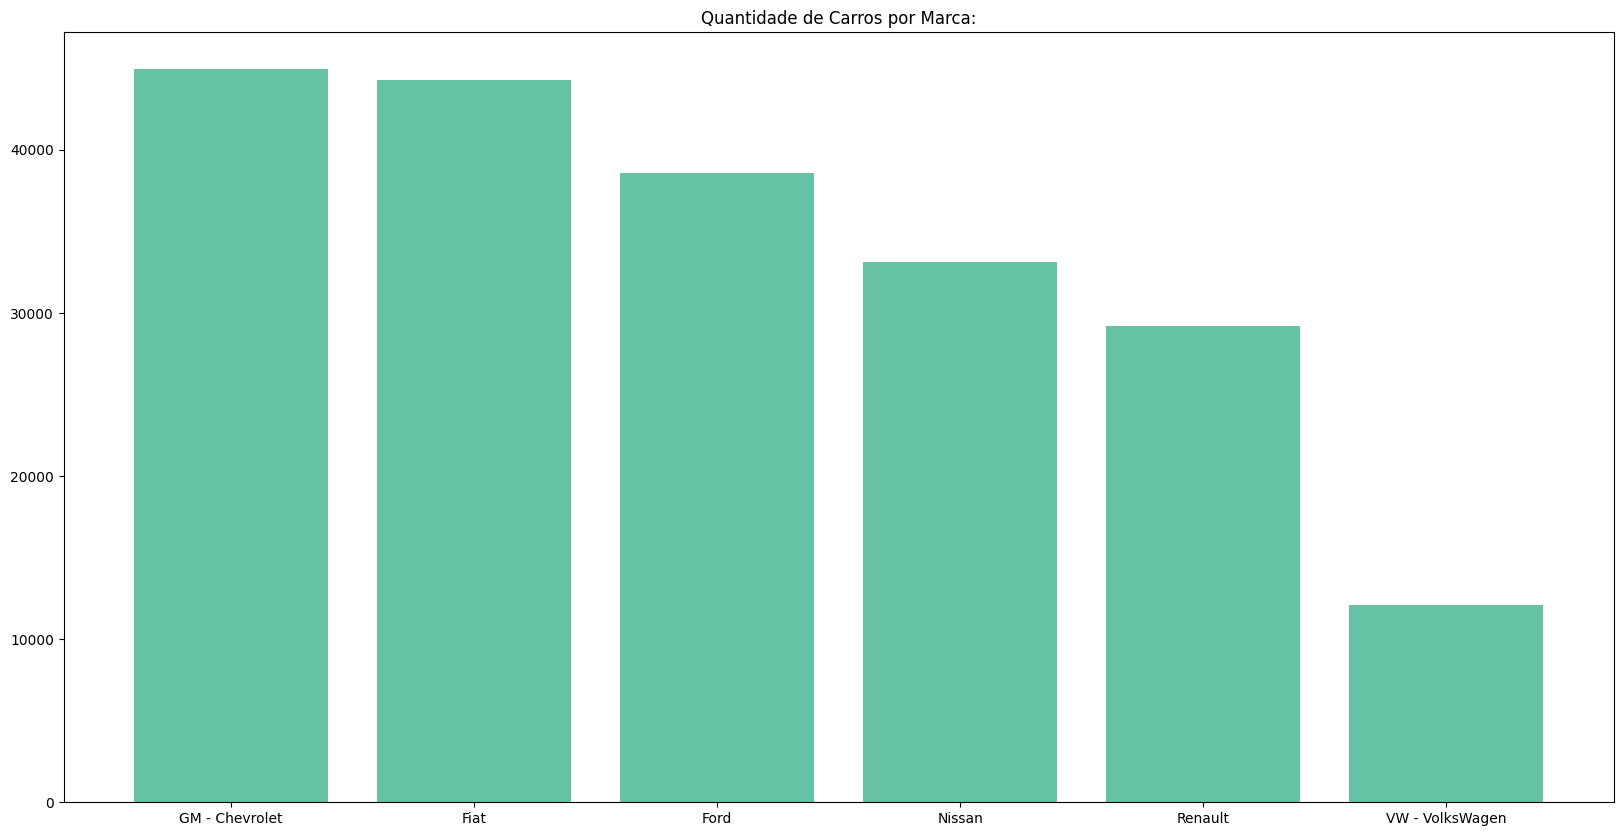

In [180]:
import matplotlib.pyplot as plt

dados['brand'].fillna('Desconhecido', inplace=True)

plt.figure(figsize=(20,10))
plt.title('Quantidade de Carros por Marca:')
grafico_carros_marca = plt.bar(dados['brand'].unique(), dados['brand'].value_counts())

b) Gere um gráfico da distribuição da quantidade de carros por tipo de engrenagem do
carro

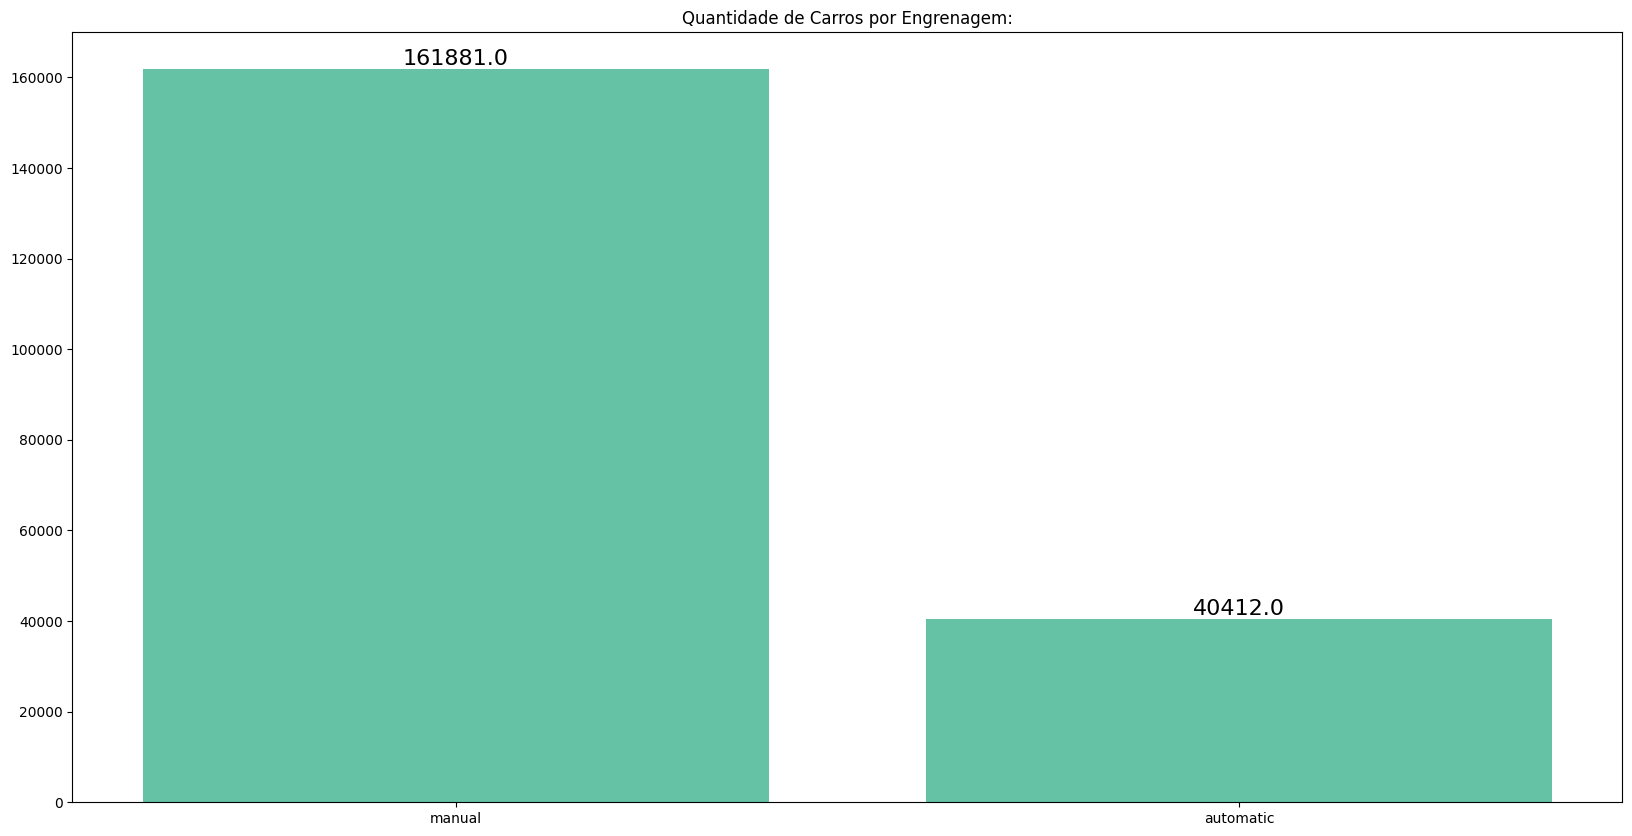

In [181]:
dados['gear'].fillna('Desconhecido', inplace=True)

plt.figure(figsize=(20,10))
plt.title('Quantidade de Carros por Engrenagem:')
grafico_carros_engrenagem = plt.bar(dados['gear'].unique(), dados['gear'].value_counts())

plt.bar_label(grafico_carros_engrenagem, fmt='%.01f', size=16, label_type='edge');

c) Gere um gráfico da evolução da média de preço dos carros ao longo dos meses de 2022 (variável de tempo no eixo X)

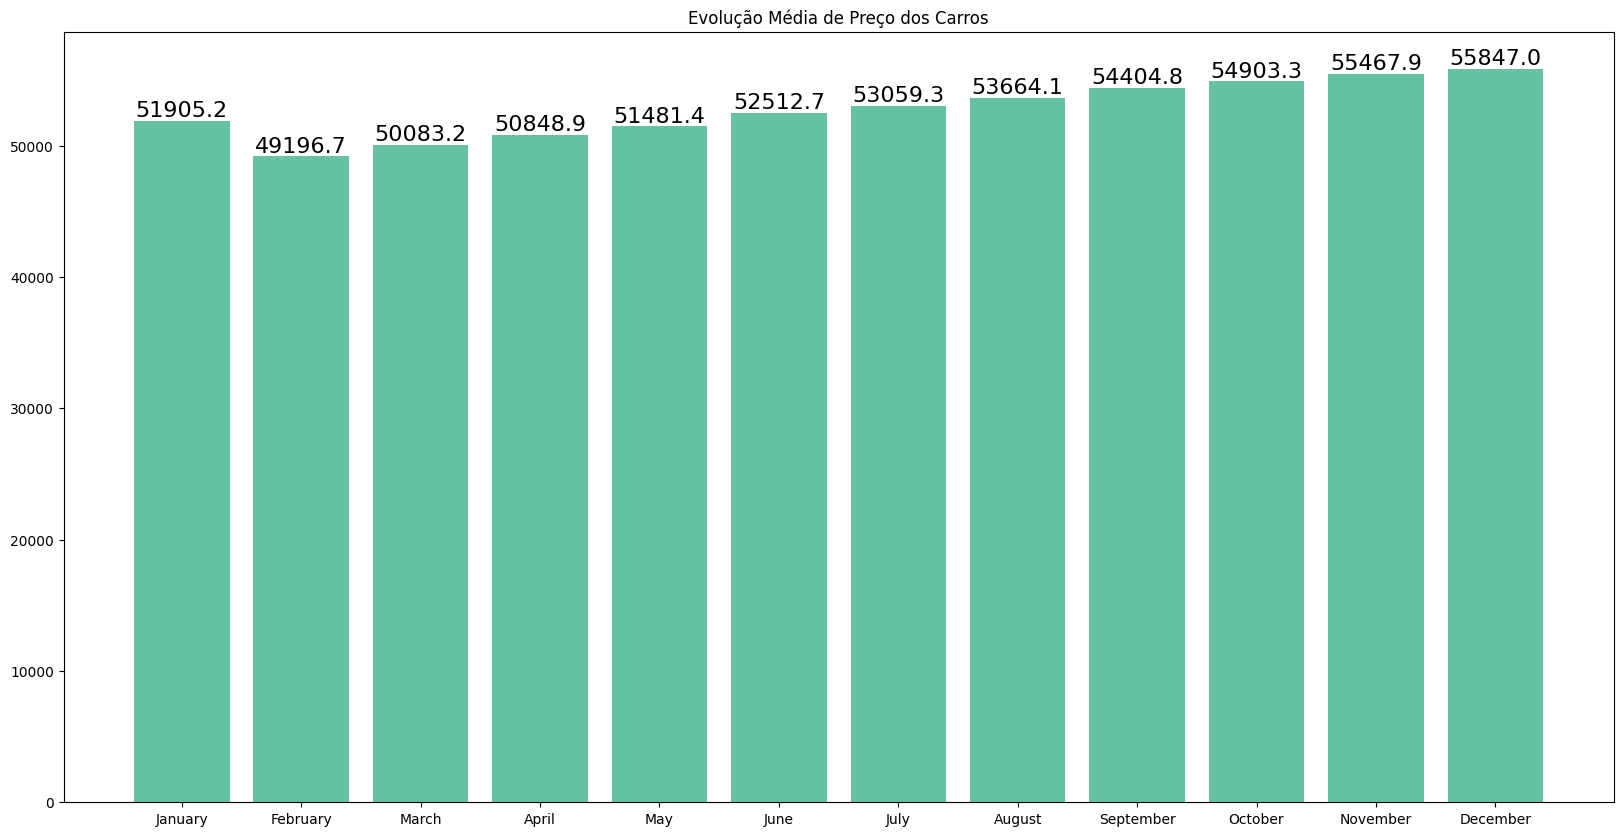

In [182]:
dados['month_of_reference'].fillna('Desconhecido', inplace=True)
dados['avg_price_brl'].fillna(0, inplace=True)

plt.figure(figsize=(20,10))
plt.title('Evolução Média de Preço dos Carros')

media_preco_meses = dados.groupby(['month_of_reference'], sort=False)['avg_price_brl'].mean().round(1)

grafico_carros_preco = plt.bar(dados['month_of_reference'].unique(), media_preco_meses)

plt.bar_label(grafico_carros_preco, fmt='%.01f', size=16, label_type='edge');

d) Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de
engrenagem

In [183]:
dados['brand'].fillna('Desconhecido', inplace=True)
dados['gear'].fillna(0, inplace=True)

media_preco_marca_engrenagem = dados.groupby(['brand','gear'])['avg_price_brl'].mean().round(1)
media_preco_marca_engrenagem2 = media_preco_marca_engrenagem.reset_index(name='Preço médio')
media_preco_marca_engrenagem2.head(10)

,brand,gear,Preço médio
0,Fiat,automatic,97396.8
1,Fiat,manual,39694.4
2,Ford,automatic,84769.1
3,Ford,manual,51783.8
4,GM - Chevrolet,automatic,88156.9
5,GM - Chevrolet,manual,52119.4
6,Nissan,automatic,94230.6
7,Nissan,manual,52680.6
8,Renault,automatic,44028.0
9,Renault,manual,47647.8


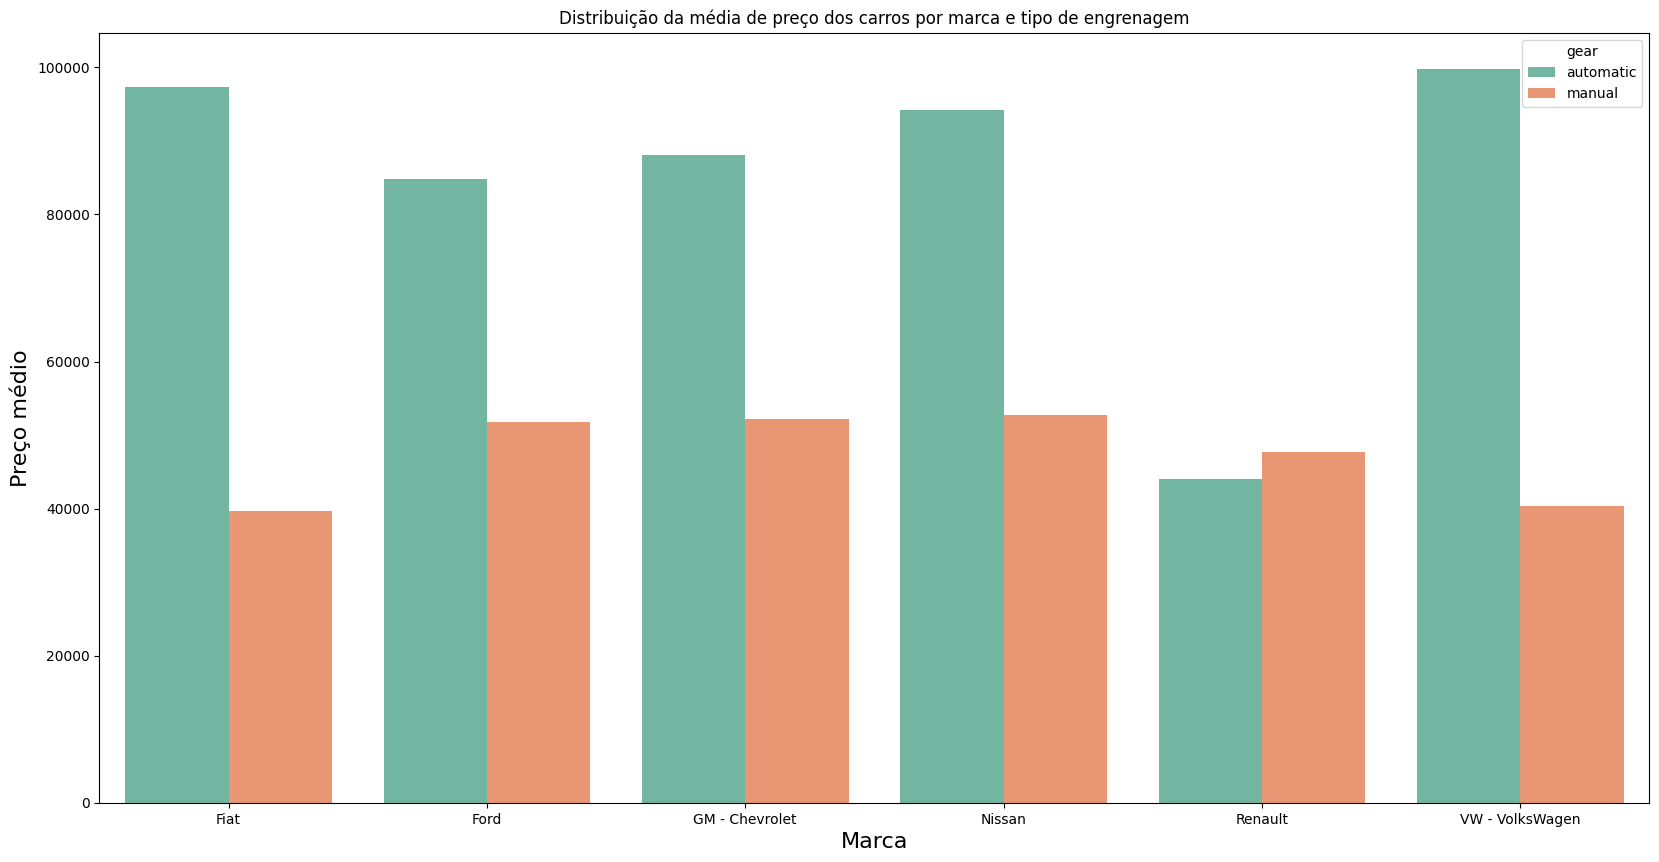

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set_palette(palette="Set2")

plt.figure(figsize=(20,10))
plt.title('Distribuição da média de preço dos carros por marca e tipo de engrenagem')

grafico = sns.barplot(x='brand', y='Preço médio', hue='gear', data=media_preco_marca_engrenagem2)

plt.ylabel('Preço médio', fontsize=16)
plt.xlabel('Marca', fontsize=16);

f) Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de combustível

In [185]:
dados['brand'].fillna('Desconhecido', inplace=True)
dados['fuel'].fillna('Desconhecido', inplace=True)

media_preco_marca_combustivel = dados.groupby(['brand','fuel'])['avg_price_brl'].mean().round(1)
media_preco_marca_combustivel2 = media_preco_marca_combustivel.reset_index(name='Preço médio')
media_preco_marca_combustivel2.head(10)

,brand,fuel,Preço médio
0,Fiat,Alcohol,11509.5
1,Fiat,Diesel,99814.5
2,Fiat,Gasoline,37197.3
3,Ford,Alcohol,10148.9
4,Ford,Diesel,94528.6
5,Ford,Gasoline,45844.5
6,GM - Chevrolet,Alcohol,13697.7
7,GM - Chevrolet,Diesel,99817.3
8,GM - Chevrolet,Gasoline,56497.1
9,Nissan,Diesel,95534.1


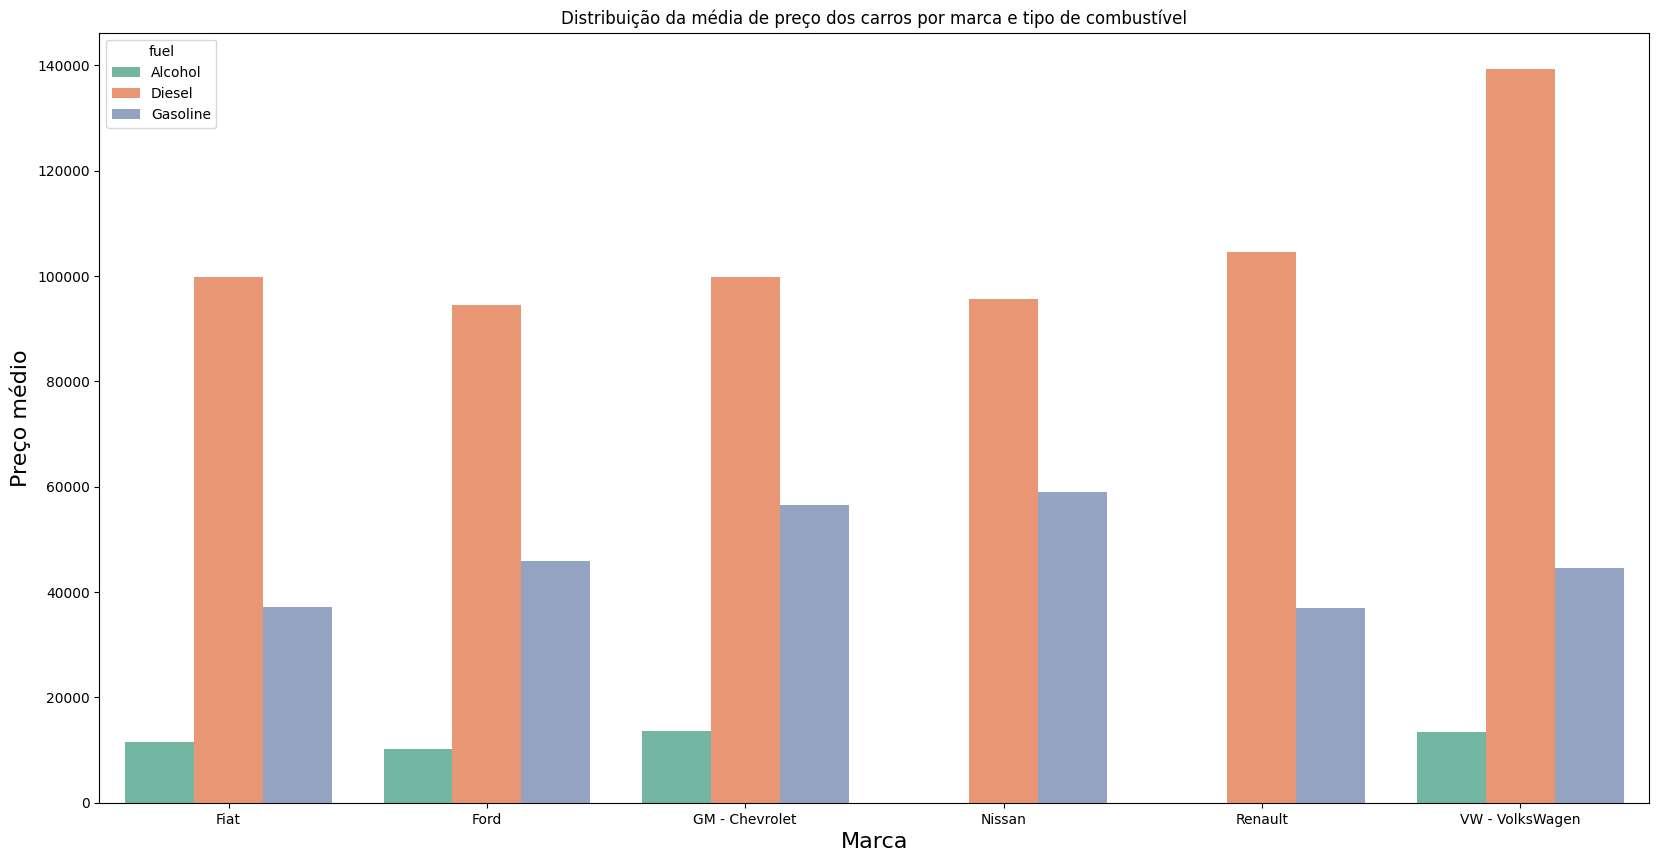

In [186]:
plt.figure(figsize=(20,10))
plt.title('Distribuição da média de preço dos carros por marca e tipo de combustível')
grafico = sns.barplot(x='brand', y='Preço médio', hue='fuel', data=media_preco_marca_combustivel2)

plt.ylabel('Preço médio', fontsize=16)
plt.xlabel('Marca', fontsize=16);

# <font color="blue">3 - Aplicação de modelos de Machine Learning para prever o preço médio dos carros</font>

A partir da base de dados precos_carros_brasil.csv, execute as seguintes tarefas:

a) Escolha as variáveis numéricas (modelos de Regressão) para serem as variáveis
independentes do modelo.A variável target é avg_price. Observação: caso julgue
necessário, faça a transformação de variáveis categóricas em variáveis numéricas para
inputar no modelo. Indique quais variáveis foram transformadas e como foram
transformadas

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

Text(0.5, 1.0, 'Distribuição de preço')

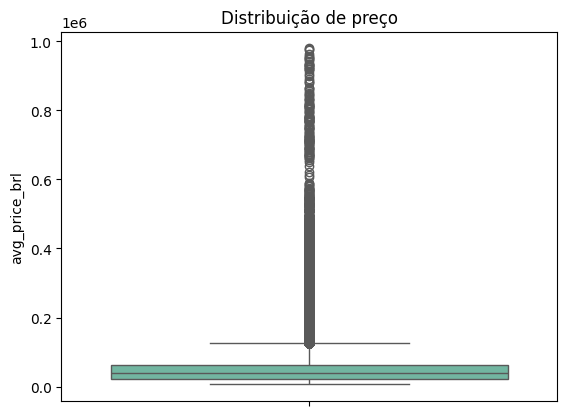

In [230]:
sns.boxplot(dados['avg_price_brl']).set_title("Distribuição de preço")

In [231]:
dados['gear'] = LabelEncoder().fit_transform(dados['gear'])
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,brand_numerico,fuel_numerico
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,1,1.0,2002.0,9162.0,3,2
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,1,1.0,2001.0,8832.0,3,2
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,1,1.0,2000.0,8388.0,3,2
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,1,1.0,2000.0,8453.0,3,1
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,1,1.6,2001.0,12525.0,3,2


In [232]:
def valor_num_brand(brand):
    if brand == 'Fiat':
        return 1
    elif brand == 'VW - VolksWagen':
        return 2
    elif brand == 'GM - Chevrolet':
        return 3
    elif brand == 'Ford':
        return 4
    elif brand == 'Renault':
        return 5
    elif brand == 'Nissan':
        return 6
    else:
        return None

dados['brand_numerico'] = dados['brand'].apply(valor_num_brand)

In [233]:
def valor_num_fuel(fuel):
    if fuel == 'Alcohol':
        return 1
    elif fuel == 'Gasoline':
        return 2
    elif fuel == 'Diesel':
        return 3
    else:
        return None

dados['fuel_numerico'] = dados['fuel'].apply(valor_num_fuel)

In [234]:
dados_numerico = dados.drop(['month_of_reference','fipe_code','authentication','fuel', 'brand','model'], axis=1)
dados_numerico.head()

,year_of_reference,gear,engine_size,year_model,avg_price_brl,brand_numerico,fuel_numerico
0,2021.0,1,1.0,2002.0,9162.0,3,2
1,2021.0,1,1.0,2001.0,8832.0,3,2
2,2021.0,1,1.0,2000.0,8388.0,3,2
3,2021.0,1,1.0,2000.0,8453.0,3,1
4,2021.0,1,1.6,2001.0,12525.0,3,2


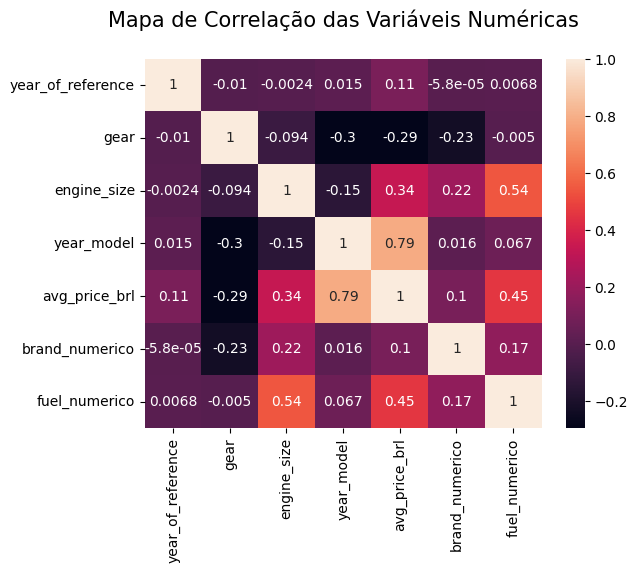

In [235]:
sns.heatmap(dados_numerico.corr("spearman"), annot = True)
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

In [236]:
X = dados_numerico.drop(['avg_price_brl'], axis=1)
X.head()

,year_of_reference,gear,engine_size,year_model,brand_numerico,fuel_numerico
0,2021.0,1,1.0,2002.0,3,2
1,2021.0,1,1.0,2001.0,3,2
2,2021.0,1,1.0,2000.0,3,2
3,2021.0,1,1.0,2000.0,3,1
4,2021.0,1,1.6,2001.0,3,2


In [237]:
Y = dados_numerico['avg_price_brl']
Y.head()

,avg_price_brl
0,9162.0
1,8832.0
2,8388.0
3,8453.0
4,12525.0


b) Crie partições contendo 75% dos dados para treino e 25% para teste


In [238]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

In [239]:
print(X_test.shape)
X_test.head(1)

(50574, 6)


,year_of_reference,gear,engine_size,year_model,brand_numerico,fuel_numerico
63359,2021.0,0,2.0,2017.0,2,3


In [240]:
Y_test.head()

,avg_price_brl
63359,154404.0
13130,10989.0
131965,80545.0
75096,43604.0
14044,57102.0


c) Treine modelos RandomForest (biblioteca RandomForestRegressor) e XGBoost
(biblioteca XGBRegressor) para predição dos preços dos carros. Observação: caso
julgue necessário, mude os parâmetros dos modelos e rode novos modelos. Indique
quais parâmetros foram inputados e indique o treinamento de cada modelo

<b>Utilizando o Random Forest</b>

In [241]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [242]:
model_rf_parametros = RandomForestRegressor(max_depth=29, min_samples_leaf=32, min_samples_split=28, n_estimators=208, random_state=43)
model_rf_parametros.fit(X_train, Y_train)

RandomForestRegressor(max_depth=29, min_samples_leaf=32, min_samples_split=28,
                      n_estimators=208, random_state=43)

<b>Utilizando o XGBoost</b>

In [243]:
model_xgboost = XGBRegressor()
model_xgboost.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

d) Grave os valores preditos em variáveis criadas


<b> Utilizando o Random Forest </b>

In [244]:
valores_preditos_rf = model_rf.predict(X_test)
valores_preditos_rf

array([145750.65241459,  12734.58753307,  85354.73956309, ...,
        63397.23112952,  67747.69713872, 182944.35858806])

In [245]:
valores_preditos_rf_parametros = model_rf_parametros.predict(X_test)
pd.DataFrame(valores_preditos_rf_parametros).round(1)

,0
0,157831.4
1,12744.9
2,84838.7
3,50280.8
4,71132.4
...,...
50569,94487.4
50570,83477.3
50571,86063.4
50572,74642.1


<b>Utilizando o XGBoost</b>

In [246]:
valores_preditos_xgboost = model_xgboost.predict(X_test)
valores_preditos_xgboost

array([152896.27,  12640.64,  84787.58, ...,  67702.45,  67642.97,
       184848.92], dtype=float32)

e) Realize a análise de importância das variáveis para estimar a variável target, para cada
modelo treinado


<b> Utilizando o Random Forest </b>

In [247]:
model_rf.feature_importances_
feature_imprtances = pd.DataFrame(model_rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_imprtances

,importance
engine_size,0.432779
year_model,0.396010
fuel_numerico,0.087650
gear,0.035614
brand_numerico,0.034449
year_of_reference,0.013497


In [248]:
model_rf_parametros.feature_importances_
feature_imprtances = pd.DataFrame(model_rf_parametros.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_imprtances

,importance
engine_size,0.432475
year_model,0.412602
fuel_numerico,0.092030
brand_numerico,0.027160
gear,0.025157
year_of_reference,0.010576


<b>Utilizando o XGBoost</b>

In [249]:
model_xgboost.feature_importances_
feature_imprtances = pd.DataFrame(model_xgboost.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_imprtances

,importance
fuel_numerico,0.374966
engine_size,0.253050
year_model,0.207939
gear,0.126453
brand_numerico,0.021984
year_of_reference,0.015608


g) Escolha o melhor modelo com base nas métricas de avaliação MSE, MAE e R² (MAPE adicionado apenas para melhor mensuração dos valores)

<b>Utlizando o Random Forest</b>

In [250]:
mse = mean_squared_error(Y_test, valores_preditos_rf)
mae = mean_absolute_error(Y_test, valores_preditos_rf)
mape = mean_absolute_percentage_error(Y_test, valores_preditos_rf)
r2 = r2_score(Y_test, valores_preditos_rf)

print(f"R2 Score: {r2}, MSE: {mse}, MAE: {mae}, MAPE: {mape}".format(r2=r2, mse=mse, mae=mae, mape=mape))

R2 Score: 0.9589932868940976, MSE: 109565494.85682932, MAE: 5589.94269767001, MAPE: 0.11141806782030578


In [251]:
mse = mean_squared_error(Y_test, valores_preditos_rf_parametros)
mae = mean_absolute_error(Y_test, valores_preditos_rf_parametros)
mape = mean_absolute_percentage_error(Y_test, valores_preditos_rf_parametros)
r2 = r2_score(Y_test, valores_preditos_rf_parametros)

print(f"R2 Score: {r2}, MSE: {mse}, MAE: {mae}, MAPE: {mape}".format(r2=r2, mse=mse, mae=mae, mape=mape))

R2 Score: 0.9358391775564081, MSE: 171430766.550305, MAE: 6278.73198203706, MAPE: 0.11885375097980756


<b>Utilizando o XGBoost</b>

In [252]:
mse = mean_squared_error(Y_test, valores_preditos_xgboost)
mae = mean_absolute_error(Y_test, valores_preditos_xgboost)
mape = mean_absolute_percentage_error(Y_test, valores_preditos_xgboost)
r2 = r2_score(Y_test, valores_preditos_xgboost)

print(f"R2 Score: {r2}, MSE: {mse}, MAE: {mae}, MAPE: {mape}".format(r2=r2, mse=mse, mae=mae, mape=mape))

R2 Score: 0.9583411538548714, MSE: 111307923.68722028, MAE: 5701.685227764946, MAPE: 0.11395472655643708


**Bônus: Hypertuning**

*A seção abaixo foi adicionada apenas como sugestão para melhorias futuras na acurácia/precisão do modelo. Com a implementação de um método de Hypertuning de parâmetros, é possível alcançar resultados até melhores em troca de um tempo maior de processamento. No caso, usamos o GridSearch ao invés do algoritmo de RandomSearch para um maior controle dos parâmetros adicionados.*

*Note que as listas de parâmetros foram reduzidas apenas para exemplificação. E apenas um modelo foi escolhido para o hypertuning, utilizando o r2 como scoring de maximização.*

In [256]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    model_rf,
    param_grid={
          "max_depth":[29],
          "min_samples_leaf":[5, 32],
          "min_samples_split":[10, 28],
          "n_estimators":[10, 50, 208]
    },
    scoring="r2",
    n_jobs=None,
    refit=True,
    cv=5,
    verbose=1,
    return_train_score=True
)

gs_results = grid_search.fit(X_train, Y_train)
gs_results.best_score_
gs_results.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=29, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=(train=0.960, test=0.961) total time=   1.4s
[CV 2/5] END max_depth=29, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=(train=0.960, test=0.961) total time=   1.1s
[CV 3/5] END max_depth=29, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=(train=0.961, test=0.958) total time=   1.1s
[CV 4/5] END max_depth=29, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=(train=0.961, test=0.959) total time=   1.4s
[CV 5/5] END max_depth=29, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=(train=0.962, test=0.954) total time=   1.7s
[CV 1/5] END max_depth=29, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=(train=0.961, test=0.961) total time=   5.6s
[CV 2/5] END max_depth=29, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=(train=0.961, test

{'max_depth': 29,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 208}